In [ ]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Gráficos interactivos
#%matplotlib ipympl
# Gráficos estáticos
#%matplotlib inline

from pytc2.sistemas_lineales import plot_plantilla
import scipy.io as sio

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)

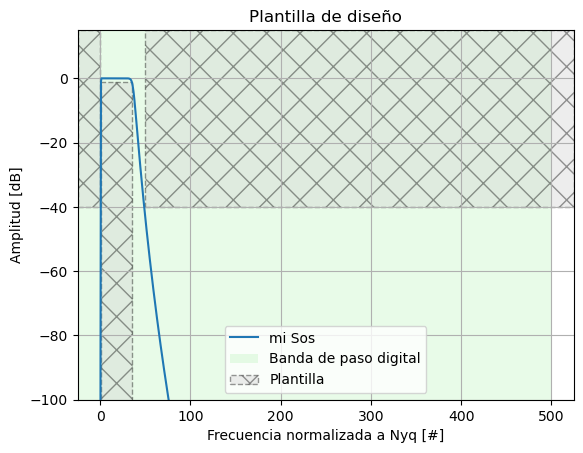

In [21]:
# Tipo de aproximación.
        
aprox_name = 'butter'
# aprox_name = 'cheby1'
# aprox_name = 'cheby2'
# aprox_name = 'ellip'

# Por qué no hay bessel ?
#aprox_name = 'bessel'

# Requerimientos de plantilla

# plantillas normalizadas a Nyquist y en dB
fs = 1000 # Frecuencia de muestreo en Hz
nyq_frec = fs/2
fpass = np.array( [1.0, 35.0] ) 
ripple = 1.0 # dB
fstop = np.array( [0.1, 50.0] ) 
attenuation = 40.0 # dB

w_rad = np.append(np.logspace(-2,0.8,250), np.logspace(0.9,1.6,250))
w_rad = np.append(w_rad, np.linspace(40,nyq_frec,500,endpoint=True))/nyq_frec * np.pi

my_sos= sig.iirdesign(fpass,fstop,ripple,attenuation,fs=fs,ftype=aprox_name,output='sos')

# Plantilla de diseño
plt.figure(1)
plt.cla()

npoints = 1000
w,hh = sig.sosfreqz(my_sos, worN=npoints)
plt.plot(w/np.pi*fs/2, 20*np.log10(np.abs(hh)+ 1e-15), label='mi Sos')

plt.title('Plantilla de diseño')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

plt.legend()




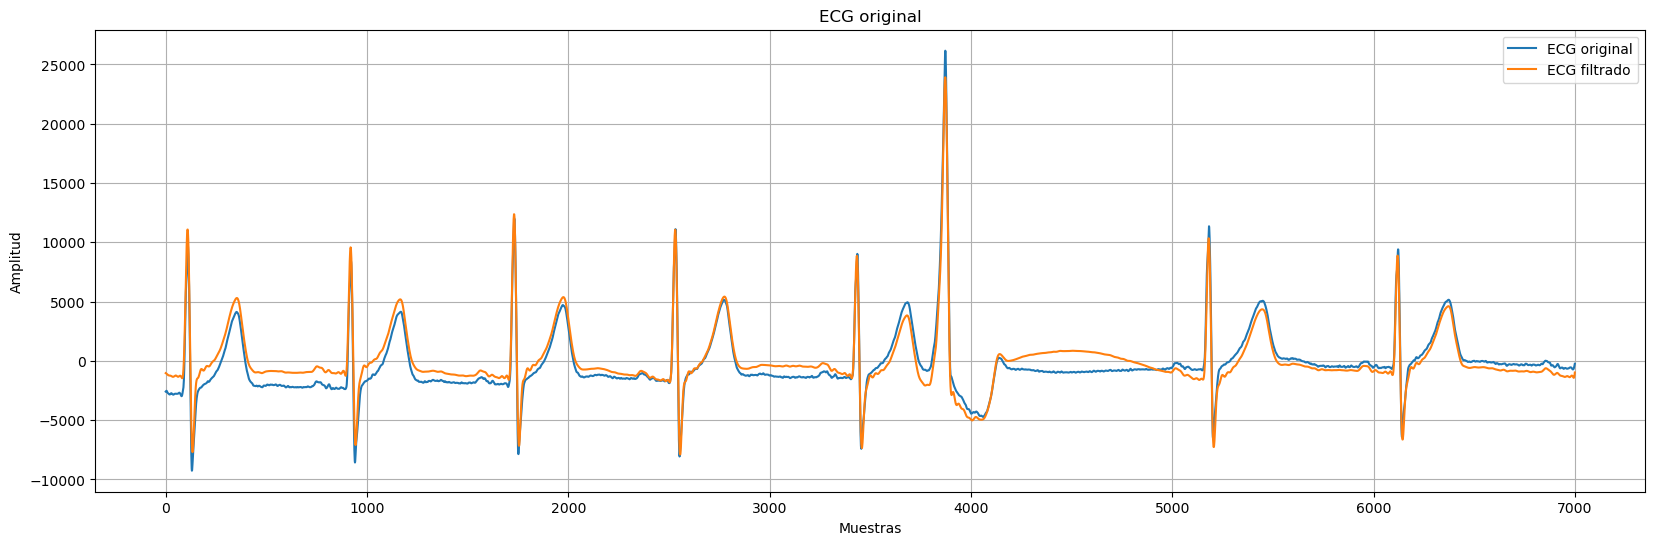

In [ ]:
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])

N = len(ecg_one_lead)
x= [N,ecg_one_lead.shape[0]]


y_ecg = sig.sosfiltfilt(my_sos, ecg_one_lead,axis=0)


plt.figure(2,figsize=(20, 6))
plt.plot(ecg_one_lead[5000:12000], label='ECG original')
plt.plot(y_ecg[5000:12000], label='ECG filtrado')
plt.title('ECG original')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(which='both', axis='both')
plt.legend()